# **Assignment 4 (Math 537, Fall 2022)**
Sanaz Hami Hassan Kiyadeh, shkiyadeh@crimson.ua.edu

# Problem 2

Consider finding roots of the function
\begin{equation*} 
	f(x) = \frac{1.5x}{(1+x^2)^2} - 0.65 \arctan \left(\frac{1}{x}\right) +\frac{0.65 x}{1 + x^2} = 0.
\end{equation*}

## Part b

The *fixed point iteration algorithm* generates a sequence of converging to a fixed point of a given function $g$ by
\begin{equation*}
    x_{k+1} = g(x_k)
\end{equation*}
until the convergence criterion
\begin{equation*}
    |g(x_k) - x_{k+1}| < \epsilon
\end{equation*}
is met for given stopping tolerance $\epsilon > 0$.
It can be shown that fixed point iteration converges linearly to the fixed point $x^*$ if $|g'(x^*)| < 1$ if $x_0$ is sufficiently close to $x^*$.

Write a Python function for performing fixed point iteration for a given function $g$, initial iterate $x_0$, maximum number of iterations, and stopping tolerance $\epsilon>0$.



In [6]:
# Fixed Point Iteration.

import numpy as np

def fixedpt(g,x0,tol,maxiter):
  err=[]
  #err[0] = np.abs(g(x0)-x0)
  e=1
  itr = 0
  xp = [x0]
  while(e > tol and itr < maxiter):
    x = g(x0)      # fixed point equation
    e = np.abs(x-x0) # error at the current step
    err.append(e)
    #print(e)
    x0 = x
    xp.append(x0)  # save the solution of the current step
    itr = itr + 1
  return err,itr,x

In [7]:
#test our function

def g(x):
  return np.sin(x)-x

tol=1e-5
maxiter=100

x0=1

fixedpt(g,x0,tol,maxiter)


([1.1585290151921035,
  0.15919219194808037,
  0.0006631768045881118,
  4.861123201020667e-11],
 4,
 0.0)

## Part c

Use the four root finding algorithms we've seen so far, i.e, Newton's Method, the secant method, bisection, and fixed point iteration
to find a root of $f(x)$.

Edit the given Jupyter notebook to call each of the four root finding functions	where indicated, using the following parameters:

1.   **Newton-Raphson:** stopping tolerance $\epsilon = 10^{-12}$, maximum number of iterations $n_{\max} = 100$, and initial iterate $x_0 = 0.05$.
2.   **Secant:**  $\epsilon  = 10^{-12}$, $n_{\max} = 100$, and initial iterates $x_0 =0.05$, $x_1 = 0.1$.
3. **Fixed Point:** $\epsilon = 10^{-12}$, $n_{\max} = 100$, $x_0 = 0.05$.
4. **Bisection:** $\epsilon = 10^{-12}$, $n_{\max} = 100$, with initial interval $[a,b] = [0.05,2]$.

Run your notebook (with given initial iterates and stopping tolerances)
to find roots of $f(x)$. You should call each function and generate a sequence of approximate roots and corresponding errors, either measured as change in $x$ (Newton-Raphson, secant, fixed point iteration), or as interval width (bisection).
	
You can use the Newton-Raphson, secant, and bisection functions from earlier in the term. You may need to modify these to obtain the sequence of approximate roots and the desired error measures.

Plot the logarithm of these error measures as a function of iteration number.

Use the script's output to answer the following questions:
*	What is the root found by each algorithm? (Report to 15 decimal places).
* Which algorithm converged in the fewest iterations? Estimate the *convergence rate* of each algorithm using the function and relative error values given by the script output.


In [8]:
# Newton-Raphson Method.

def Newton(f,df, x0, nmax, tol):
  
  # Initialization.  
  x = np.zeros(nmax)
  x[0] = x0 # initialize iterates.
  iter = 0 # iteration counter
  fx = 1  # initial function value is greater than tol.
  err=[]
  # Update iterate until a root is found or max # of iterations are performed.
  while (iter < nmax and abs(fx) > tol):
    # Calculate function value and derivative.
    fx, dfx = f(x[iter]),df(x[iter])
    err.append(abs(fx))
    # Update x.
    x[iter + 1] = x[iter] - fx/dfx

    # Update iter.
    iter += 1
  

  # return iterates x at termination.
  return(x[:iter], iter,err)
# end def.


In [9]:
# Secant Method

from numpy import abs
def Secant(f, x0, x1, nmax, tol):
  x=[]
  x.append(x0)
  x.append(x1)
  n=1 # iteration counter
  err=[]
  err.append(abs(f(x[0])))
  err.append(abs(f(x[1])))
  while (n<nmax and err[n]>tol):
    x_new=x[n]-f(x[n])*((x[n]-x[n-1])/(f(x[n])-f(x[n-1])))
    x.append(x_new)
    n+=1
    err.append(abs(f(x_new)))
  return err,n,x


In [10]:
# Bisection Method.

def bisect(f, a, b, nmax,tol):
    err=[]
    e=1
    iter=0
    while (e>tol and iter<nmax): # Repeat until maximum number of iterations is performed.
        # Update midpoint of current interval [a,b].
        m = 0.5*(a+b)
        # Use if/else to update interval containing the root.
        if f(a)*f(m) < 0: # A root is in (a,m)
            # Replace b with m. New interval is [a,m]
            b = m
        elif f(m) == 0: # m is a root.
            a = m; b = m # Set interval to [m,m].
        else: # A root is in [m,b]
            a = m 
        iter+=1
        e=abs(f(m))
        #print(e)
        err.append(e)

    # Return final value of m as the root.
    return err,m,iter


In [11]:
#setting our parameters

x0=0.05
x1=0.1 #secant method
b=2 #bisection method
tol=1e-12
nmax=100



In [12]:
#defining f and its derivative
def f(x):
  return (1.5*x) / ((1+x**2)**2) -0.65 * np.arctan(1/x) +(0.65*x)/(1+x**2)
def df(x):
  return (2.8 - 3.2*x**2)/((1 + x**2)**3)

In [13]:
f(2)

0.07862905414947602

In [14]:
x_N,iter_N,err_N=Newton(f,df,x0,nmax,tol)

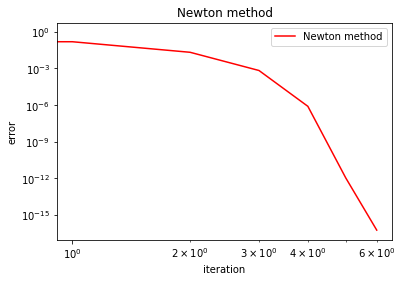

In [15]:
import matplotlib.pyplot as plt
plt.xscale("log")
plt.yscale("log")
plt.plot(range(iter_N),err_N, color="r", label="Newton method")

plt.xlabel("iteration")
plt.ylabel("error")
plt.title("Newton method")
plt.legend()
plt.show()

In [16]:
err_S,iter_S,x_S=Secant(f,x0,x1,nmax,tol)

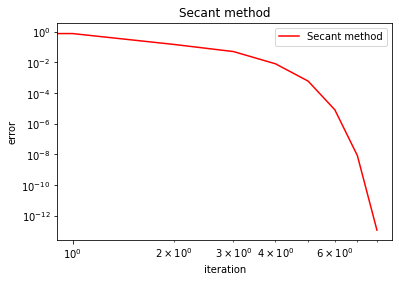

In [17]:
import matplotlib.pyplot as plt
plt.xscale("log")
plt.yscale("log")
plt.plot(range(iter_S+1),err_S, color="r", label="Secant method")

plt.xlabel("iteration")
plt.ylabel("error")
plt.title("Secant method")
plt.legend()
plt.show()

In [18]:
def f_fix(x):
  return (13/30)*(1+x**2)*((1+x**2)*np.arctan(1/x)-x)


In [19]:
fixedpt(f_fix,x0,tol,nmax)

([0.5906082045850013,
  0.169245340253509,
  0.010634744424803888,
  0.0012634311184013813,
  0.00014535825272404823,
  1.678807930854953e-05,
  1.938072740070851e-06,
  2.237491229517552e-07,
  2.583152497459551e-08,
  2.98221547456734e-09,
  3.4429281647874177e-10,
  3.974848228338601e-11,
  4.588995849985622e-12,
  5.297984273511247e-13],
 14,
 0.4808644852928405)

In [20]:
err_F,iter_F,x_F=fixedpt(f_fix,x0,tol,nmax)
print(iter_F)
print(x_F)

14
0.4808644852928405


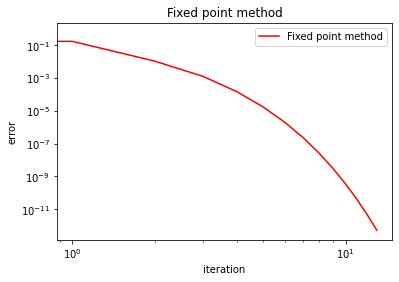

In [21]:
import matplotlib.pyplot as plt
plt.xscale("log")
plt.yscale("log")
plt.plot(range(iter_F),err_F, color="r", label="Fixed point method")

plt.xlabel("iteration")
plt.ylabel("error")
plt.title("Fixed point method")
plt.legend()
plt.show()

In [22]:
err_B,x_B,iter_B=bisect(f,x0,b,nmax,tol)

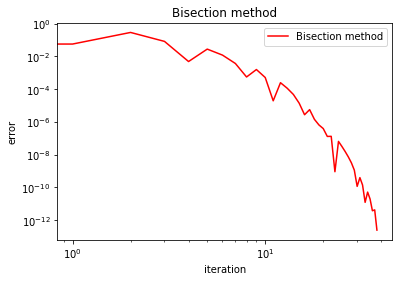

In [23]:
import matplotlib.pyplot as plt
plt.xscale("log")
plt.yscale("log")
plt.plot(range(iter_B),err_B, color="r", label="Bisection method")

plt.xlabel("iteration")
plt.ylabel("error")
plt.title("Bisection method")
plt.legend()
plt.show()

In [24]:
print("   \t | Newton \t \t | Secant \t \t | Bisection \t \t| Fixed point")
print("============================================================================================")
print("root \t |%1.15f  \t |%1.15f \t |%1.15f \t|%1.15f \t" %(x_N[iter_N-1],x_S[iter_S-1], x_B,x_F))

#, x_S[iter_S], x_B, x_F[iter_F])       \t | %1.15f \t | %1.15f

   	 | Newton 	 	 | Secant 	 	 | Bisection 	 	| Fixed point
root 	 |0.480864485292895  	 |0.480864477645743 	 |0.480864485293114 	|0.480864485292840 	


In [25]:
print(iter_N,iter_S,iter_B,iter_F)

7 8 39 14


As we can see from  above, the Newton method takes fewer iterations. The convergence rates of Newton method and Secant method is quadratics, However the two other methods have linear convergence rate.

# Problem 3

We saw in class that we should avoid calculating the matrix inverse when solving a linear system. We'll empirically verify this claim by repeatedly solving random linear systems using the inverse and Gaussian elimination.

For each $n = 50, 100, 200, 400, 800, 1600$, generate $10$ random linear systems of the form $Ax = b$. To do so, generate a random $n\times n$ matrix $A$ and $n$-dimensional right-hand side vector $b$ using the function **np.random.rand**.

Solve each linear system using:
* The matrix inversion function **np.linalg.inv** to find $A^{-1}$ and using the identity $x = A^{-1} b$.
* The function **np.linalg.solve**.

Record the amount of time needed to solve each linear system, and plot the average run-times of each approach as a function of $n$ using a log-log scale.

In [26]:
import numpy as np
#generating random matrix and vector of size n
def gen(n):
  b=np.random.rand(n)
  A=np.random.rand(n,n)
  return A,b

In [27]:
n_vec=[50,100,200,400,800,1600]
from time import perf_counter
inv_time=np.zeros((6,10))
sol_time=np.zeros((6,10))

for j in range(len(n_vec)):
  for i in range(10):
    A,b=gen(n_vec[j])

    #storing time for the first method (inv)
    t_start = perf_counter()
    x=np.matmul(np.linalg.inv(A),b)
    t_stop = perf_counter()
    inv_time[j][i]=t_stop-t_start

    #storing time for the second method (solve)

    t_start=perf_counter()
    x=np.linalg.solve(A,b)
    t_stop=perf_counter()
    sol_time[j][i]=t_stop-t_start





In [28]:

#taking average of our experiment:

inv_time_av=np.mean(inv_time,1)
sol_time_av=np.mean(sol_time,1)


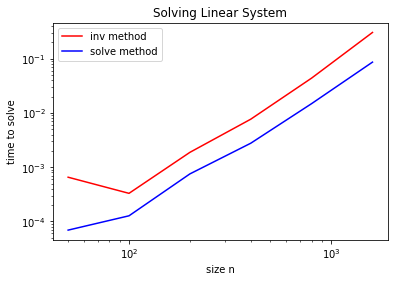

In [29]:
#plotting and comparison

import matplotlib.pyplot as plt
plt.xscale("log")
plt.yscale("log")
plt.plot(n_vec,inv_time_av, color="r", label="inv method")
plt.plot(n_vec,sol_time_av, color="b", label="solve method")
plt.xlabel("size n")
plt.ylabel("time to solve")
plt.title("Solving Linear System")
plt.legend()
plt.show()